# Airbnb ROI Predictor Model

## Introduction

<p>This aim is to build a model consisting of 2 sub-models.</p>
<p>Upon feeding the model the property features, one will predict the profit of renting the property on Airbnb (The model will predict the yield per day and assume the number of days it will be rented out).</p>
<p>The second model will estimate the price of the property depending on its features.</p>
<p>The result will be based on the results of the 2 sub-models to calculate the ROI for the provided property.</p>
<p>The Dataset was downloaded from Kaggle, you can find a reference to it <a href="https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset">here</a></p>

## Exploring The Dataset

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the airbnb dataset
df = pd.read_csv('datasets/airbnb-cleaned-europe-dataset.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [86]:
df['Day'].value_counts()

Weekday    20886
Weekend    20828
Name: Day, dtype: int64

In [87]:
df['Room Type'].value_counts()

Entire home/apt    28264
Private room       13134
Shared room          316
Name: Room Type, dtype: int64

## Data Preparation

<p>Here we see that the columns Day and Room Type are categorical data, and we'll convert them to numric data by using One-Hot Encoding (Dummy Variables)</p>

In [88]:
pd.get_dummies(df['Day'])

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41709,0,1
41710,0,1
41711,0,1
41712,0,1


In [89]:
# Join with data set
df = df.join(pd.get_dummies(df['Day']))

In [90]:
pd.get_dummies(df['Room Type'])

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
41709,1,0,0
41710,1,0,0
41711,1,0,0
41712,0,1,0


In [91]:
temp = df[df['Room Type'] == 'Private room']
temp['Private Room'].value_counts()

True    13134
Name: Private Room, dtype: int64

In [92]:
temp = df[df['Room Type'] == 'Shared room']
temp['Shared Room'].value_counts()

True    316
Name: Shared Room, dtype: int64

<p>Here we can see that all the private room type has value true in the Private Room column, so we can drop the Private Room column before doing the join.</p>
<p>The same goes for the Shared Room column.</p>

In [93]:
df.drop('Private Room', axis=1, inplace=True)
df.drop('Shared Room', axis=1, inplace=True)

In [94]:
# Join with data set
df = df.join(pd.get_dummies(df['Room Type']))

In [95]:
df.drop('Room Type', axis=1, inplace=True)
df.drop('Day', axis=1, inplace=True)
df.head()

,City,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room,Shared room
0,Amsterdam,194.033698,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1,0,0,1,0
1,Amsterdam,344.245776,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,1,0,0,1,0
2,Amsterdam,264.101422,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1,0,0,1,0
3,Amsterdam,433.529398,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,1,0,0,1,0
4,Amsterdam,485.552926,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,1,0,0,1,0


Now we're going to convert the superhost column to numeric values, to 1 and 0 instead of True and False

In [96]:
df['Superhost'] = df['Superhost'].astype(int)
df.head()

,City,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room,Shared room
0,Amsterdam,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1,0,0,1,0
1,Amsterdam,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,1,0,0,1,0
2,Amsterdam,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1,0,0,1,0
3,Amsterdam,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,1,0,0,1,0
4,Amsterdam,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,1,0,0,1,0


Now we have all the columns as numeric values except the city column

# continue from here <==============================

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Person Capacity'}>,
        <Axes: title={'center': 'Superhost'}>,
        <Axes: title={'center': 'Multiple Rooms'}>],
       [<Axes: title={'center': 'Business'}>,
        <Axes: title={'center': 'Cleanliness Rating'}>,
        <Axes: title={'center': 'Guest Satisfaction'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'City Center (km)'}>,
        <Axes: title={'center': 'Metro Distance (km)'}>,
        <Axes: title={'center': 'Attraction Index'}>,
        <Axes: title={'center': 'Normalised Attraction Index'}>],
       [<Axes: title={'center': 'Restraunt Index'}>,
        <Axes: title={'center': 'Normalised Restraunt Index'}>,
        <Axes: title={'center': 'Weekday'}>,
        <Axes: title={'center': 'Weekend'}>],
       [<Axes: title={'center': 'Entire home/apt'}>,
        <Axes: title={'center': 'Private room'}>,
        <Axes: title={'center': 'Shared room'}>, <Axes: >

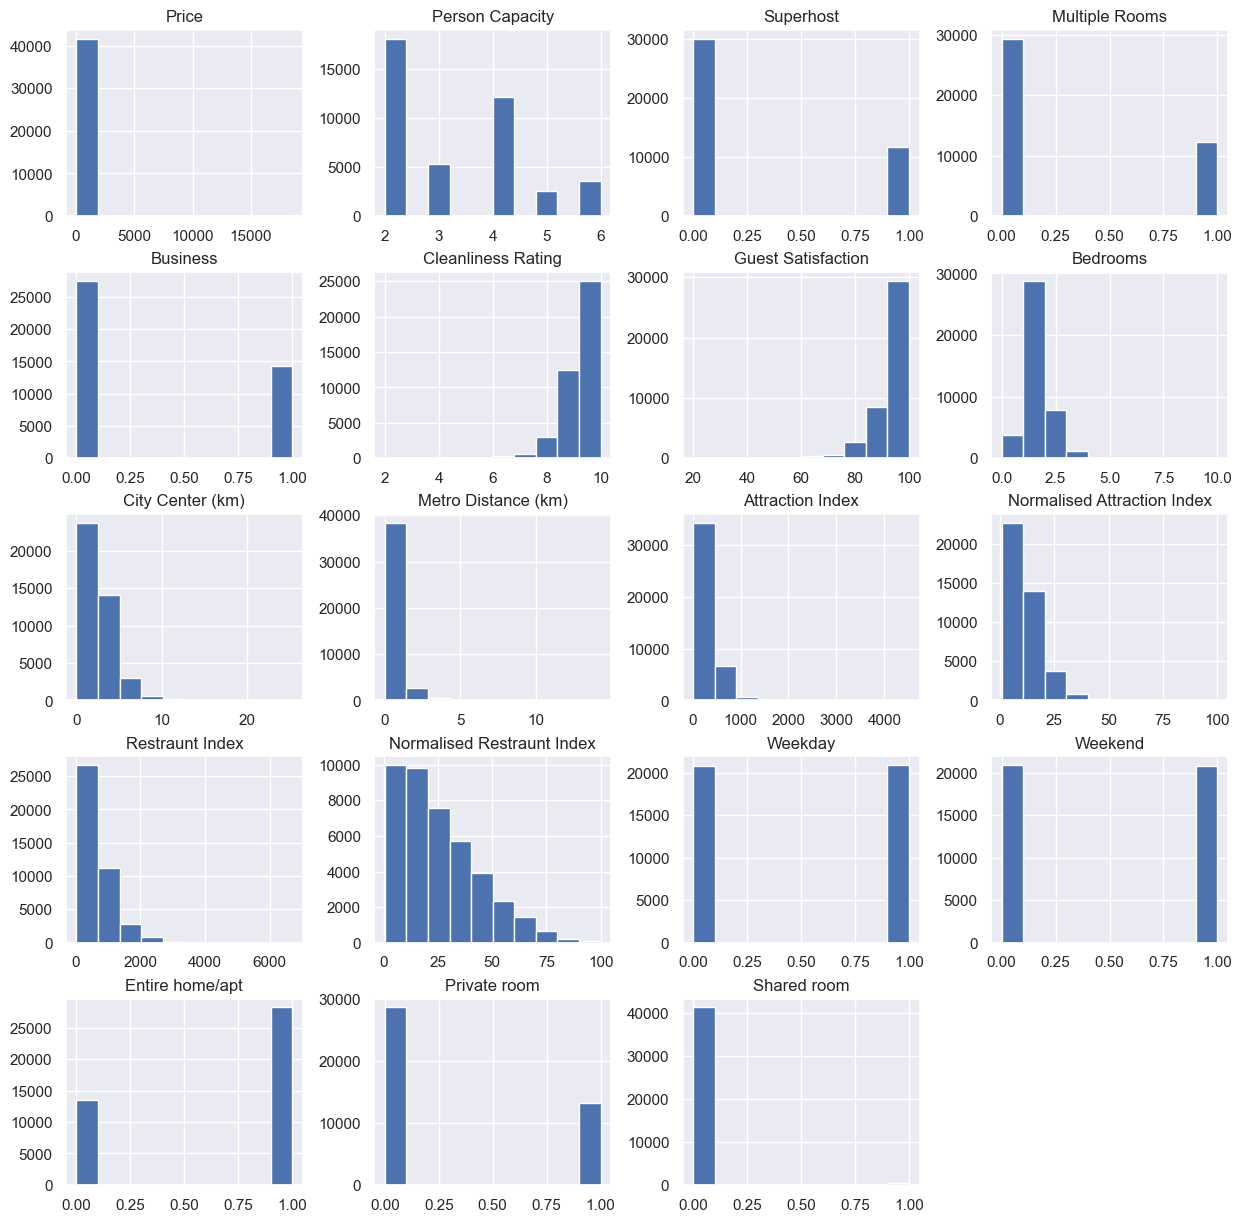

In [97]:
df.hist(figsize=(15,15))

In [98]:
df.drop('Shared room', axis=1, inplace=True)
df.drop('Attraction Index', axis=1, inplace=True)
df.drop('Restraunt Index', axis=1, inplace=True)

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Person Capacity'}>,
        <Axes: title={'center': 'Superhost'}>,
        <Axes: title={'center': 'Multiple Rooms'}>],
       [<Axes: title={'center': 'Business'}>,
        <Axes: title={'center': 'Cleanliness Rating'}>,
        <Axes: title={'center': 'Guest Satisfaction'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'City Center (km)'}>,
        <Axes: title={'center': 'Metro Distance (km)'}>,
        <Axes: title={'center': 'Normalised Attraction Index'}>,
        <Axes: title={'center': 'Normalised Restraunt Index'}>],
       [<Axes: title={'center': 'Weekday'}>,
        <Axes: title={'center': 'Weekend'}>,
        <Axes: title={'center': 'Entire home/apt'}>,
        <Axes: title={'center': 'Private room'}>]], dtype=object)

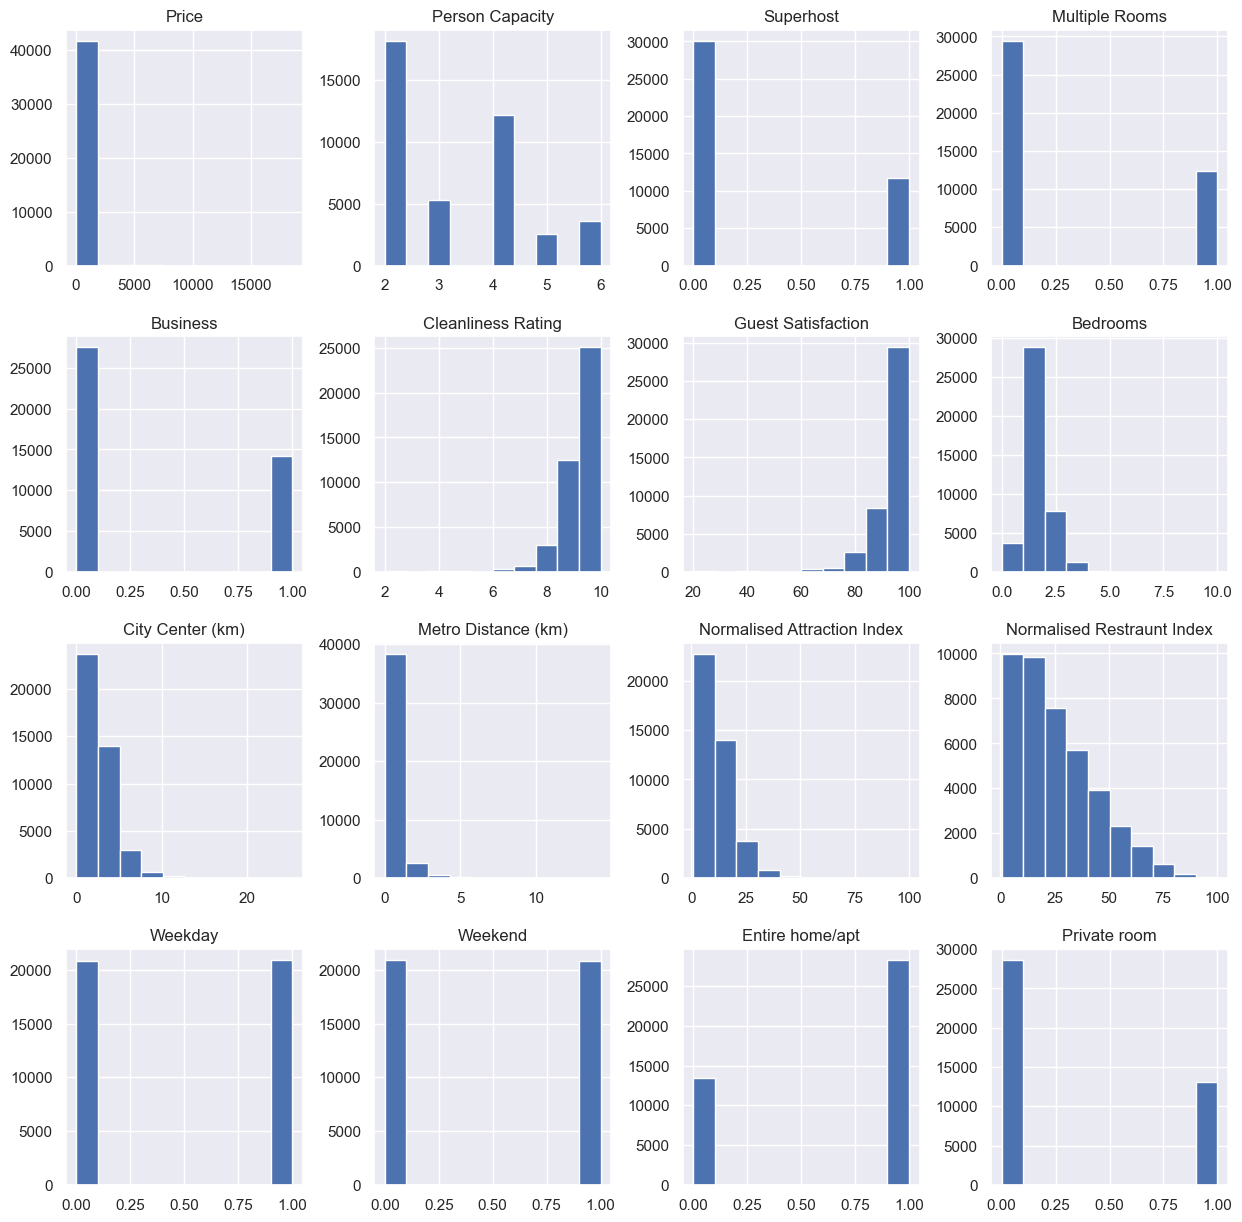

In [99]:
df.hist(figsize=(15,15))

In [100]:
df.corr(numeric_only=True)

,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room
Price,1.000000,0.179969,-0.040391,-0.055322,0.014206,0.003987,0.016069,0.206687,-0.052462,-0.038989,0.270958,0.219385,-0.011076,0.011076,0.155842,-0.149694
Person Capacity,0.179969,1.000000,0.036633,-0.058319,0.099836,0.010089,0.017348,0.559161,-0.077547,0.008423,-0.052291,-0.010956,0.010852,-0.010852,0.464986,-0.475804
Superhost,-0.040391,0.036633,1.000000,0.087061,-0.091925,0.279584,0.292312,0.023717,-0.024647,0.014925,-0.056138,-0.058594,0.008162,-0.008162,0.061747,-0.056006
Multiple Rooms,-0.055322,-0.058319,0.087061,1.000000,-0.465811,0.033897,0.040208,-0.005096,0.032846,0.035222,-0.021696,-0.043169,0.007876,-0.007876,-0.142408,0.146854
Business,0.014206,0.099836,-0.091925,-0.465811,1.000000,-0.076511,-0.178954,-0.022079,-0.181273,-0.066284,0.020663,0.089935,0.007191,-0.007191,0.011670,-0.022433
Cleanliness Rating,0.003987,0.010089,0.279584,0.033897,-0.076511,1.000000,0.691645,0.030951,0.004794,0.019296,-0.041859,-0.047907,-0.001042,0.001042,0.035508,-0.026518
Guest Satisfaction,0.016069,0.017348,0.292312,0.040208,-0.178954,0.691645,1.000000,0.042753,0.031176,0.025290,-0.024609,-0.047862,-0.002079,0.002079,0.058849,-0.052664
Bedrooms,0.206687,0.559161,0.023717,-0.005096,-0.022079,0.030951,0.042753,1.000000,0.000041,0.053605,-0.082276,-0.076505,0.014214,-0.014214,0.145784,-0.142468
City Center (km),-0.052462,-0.077547,-0.024647,0.032846,-0.181273,0.004794,0.031176,0.000041,1.000000,0.458042,-0.321315,-0.379199,0.001331,-0.001331,-0.136155,0.133191
Metro Distance (km),-0.038989,0.008423,0.014925,0.035222,-0.066284,0.019296,0.025290,0.053605,0.458042,1.000000,-0.236217,-0.222897,0.011634,-0.011634,-0.029155,0.032350


<Axes: >

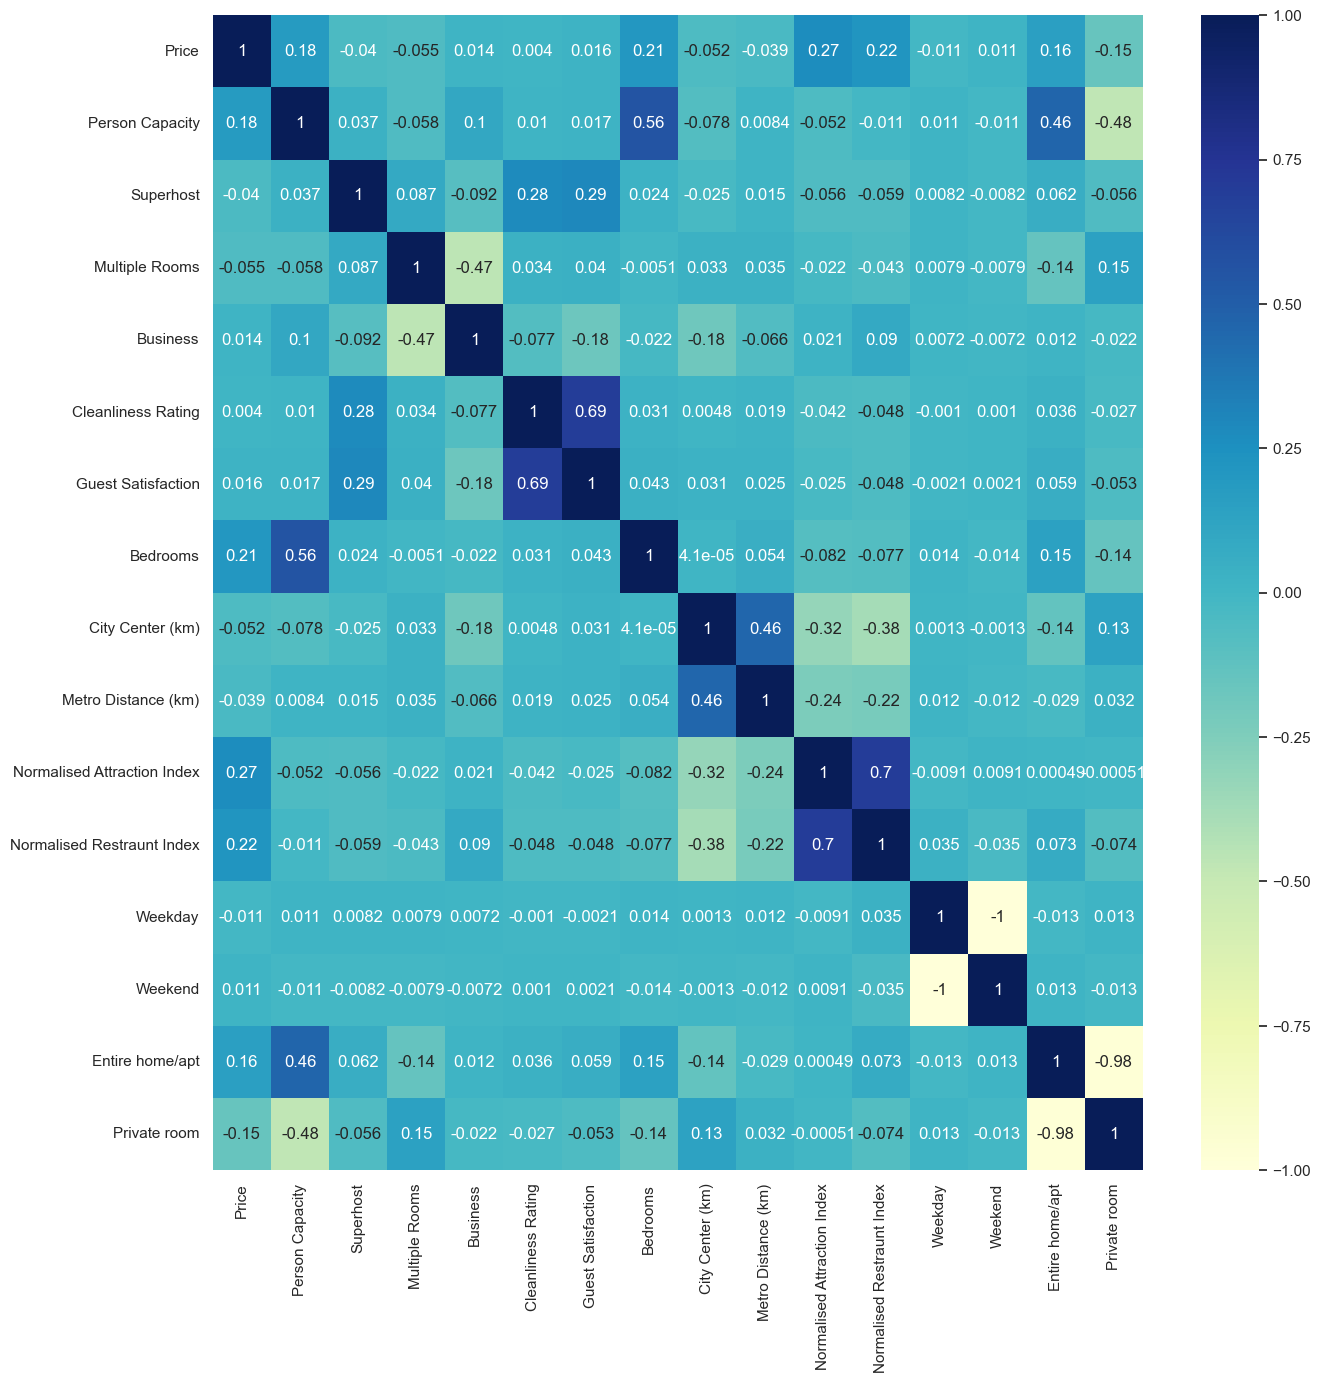

In [101]:
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)

## Linear Regression Model

In [102]:
# Data Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def get_copy_by_city_name(cityName):
    temp = df.copy()
    temp = temp[temp['City'] == cityName]
    temp.drop('City', axis=1, inplace=True)
    return temp

temp = get_copy_by_city_name('Rome')

def split_test_train_set(temp):
    x, y = temp.drop('Price', axis=1), temp['Price']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_test_train_set(temp)

In [103]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9027 entries, 29150 to 38176
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9027 non-null   float64
 1   Person Capacity              9027 non-null   float64
 2   Superhost                    9027 non-null   int64  
 3   Multiple Rooms               9027 non-null   int64  
 4   Business                     9027 non-null   int64  
 5   Cleanliness Rating           9027 non-null   float64
 6   Guest Satisfaction           9027 non-null   float64
 7   Bedrooms                     9027 non-null   int64  
 8   City Center (km)             9027 non-null   float64
 9   Metro Distance (km)          9027 non-null   float64
 10  Normalised Attraction Index  9027 non-null   float64
 11  Normalised Restraunt Index   9027 non-null   float64
 12  Weekday                      9027 non-null   uint8  
 13  Weekend      

In [104]:
reg = LinearRegression()

# Train the model
reg.fit(x_train, y_train)

LinearRegression()

In [105]:
reg.score(x_test, y_test)

0.3563474507271214

## Random Forest Regression Model

In [106]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [107]:
forest.score(x_test, y_test)

0.7275358533441669

In [108]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_features": [4, 6, 8, 12, 16]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 6, 8, 12, 16],
                         'n_estimators': [50, 100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [109]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=6, n_estimators=300)

In [110]:
best_forest.score(x_test, y_test)

0.7362584136736683

### Convert price to categorical value
We'll try to improve the score by converting the price to categorical value

In [150]:
interval = 20
def convert_to_interval(price):
    newPrice = int(price / interval)
    return newPrice

temp = get_copy_by_city_name('Rome')

temp['Price'] = temp['Price'].apply(convert_to_interval)

x_train, x_test, y_train, y_test = split_test_train_set(temp)

In [112]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [113]:
forest.score(x_test, y_test)

0.5180431602613843

In [114]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_features": [4, 6, 8, 12, 16]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 6, 8, 12, 16],
                         'n_estimators': [50, 100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=6, n_estimators=300)

In [116]:
best_forest.score(x_test, y_test)

0.5434853955146253

## We'll try Neural Network

In [118]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

temp = get_copy_by_city_name('Rome')

temp['Price'] = temp['Price'].apply(convert_to_interval)

x_train, x_test, y_train, y_test = split_test_train_set(temp)

In [125]:
len(y_train.value_counts())

52

In [195]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(units=60, activation='relu'))

In [196]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [197]:
model.fit(x_train, y_train, epochs=200, batch_size=30)

Epoch 1/200
241/241 [==============================] - 0s 709us/step - loss: -37.7927 - accuracy: 0.0017
Epoch 2/200
241/241 [==============================] - 0s 686us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 3/200
241/241 [==============================] - 0s 710us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 4/200
241/241 [==============================] - 0s 699us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 5/200
241/241 [==============================] - 0s 695us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 6/200
241/241 [==============================] - 0s 808us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 7/200
241/241 [==============================] - 0s 705us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 8/200
241/241 [==============================] - 0s 667us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 9/200
241/241 [==============================] - 0s 646us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 10/200
241/241 [=

241/241 [==============================] - 0s 636us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 150/200
241/241 [==============================] - 0s 624us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 151/200
241/241 [==============================] - 0s 630us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 152/200
241/241 [==============================] - 0s 624us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 153/200
241/241 [==============================] - 0s 630us/step - loss: -38.8104 - accuracy: 6.9242e-04
Epoch 154/200
241/241 [==============================] - 0s 626us/step - loss: -38.8104 - accuracy: 6.9242e-04
Epoch 155/200
241/241 [==============================] - 0s 623us/step - loss: -38.8104 - accuracy: 6.9242e-04
Epoch 156/200
241/241 [==============================] - 0s 622us/step - loss: -38.8104 - accuracy: 6.9242e-04
Epoch 157/200
241/241 [==============================] - 0s 627us/step - loss: -38.8105 - accuracy: 6.9242e-04
Epoch 158/200
2

In [198]:
y_hit = model.predict(x_test)

57/57 [==============================] - 0s 423us/step


In [199]:

y_hit_fixed = [(pd.Series(y_hit[i]).idxmax() * interval) for i in range(10)]

In [200]:
print(y_hit_fixed)

[660, 660, 660, 660, 660, 660, 660, 660, 660, 660]
